# Environmental Insights Tutorial

## Initial Setup
Import relevant modules for the tutorial, both from the Environmental Insight package (air_pollution_functions, data, models) and auxiliary modules (numpy and matplotlib)

In [1]:
from environmental_insights import air_pollution_functions as ei_air_pollution_functions
from environmental_insights import data as ei_data
from environmental_insights import models as ei_models
from environmental_insights import download as ei_download

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

## Loading Data

Load in the data that represents the gridded system used for both the global and the UK Model. 

In [2]:
# Load in the grids that represent the UK Model
uk_grids = ei_data.get_uk_grids()
display(uk_grids)

,UK_Model_Grid_ID,geometry,geometry Centroid
0,3327,"POLYGON ((-627291.443 6441331.988, -626291.443...",POINT (-626791.443 6440831.988)
1,3328,"POLYGON ((-627291.443 6442331.988, -626291.443...",POINT (-626791.443 6441831.988)
2,3329,"POLYGON ((-627291.443 6443331.988, -626291.443...",POINT (-626791.443 6442831.988)
3,3330,"POLYGON ((-627291.443 6440331.988, -626291.443...",POINT (-626791.443 6439831.988)
4,3331,"POLYGON ((-627291.443 6439331.988, -626291.443...",POINT (-626791.443 6438831.988)
...,...,...,...
355822,641080,"POLYGON ((195708.557 6853331.988, 196708.557 6...",POINT (196208.557 6852831.988)
355823,641081,"POLYGON ((195708.557 6854331.988, 196708.557 6...",POINT (196208.557 6853831.988)
355824,641082,"POLYGON ((195708.557 6855331.988, 196708.557 6...",POINT (196208.557 6854831.988)
355825,641083,"POLYGON ((195708.557 6856331.988, 196708.557 6...",POINT (196208.557 6855831.988)


In [3]:
# Load in the grids that represent the Global Model
global_grids = ei_data.get_global_grids()
display(global_grids)

,Global Model Grid ID,geometry
0,49,"POLYGON ((-180 71.6341, -179.75 71.6341, -179...."
1,50,"POLYGON ((-180 71.3841, -179.75 71.3841, -179...."
2,51,"POLYGON ((-180 71.1341, -179.75 71.1341, -179...."
3,59,"POLYGON ((-180 69.1341, -179.75 69.1341, -179...."
4,60,"POLYGON ((-180 68.8841, -179.75 68.8841, -179...."
...,...,...
363746,1000796,"POLYGON ((179.75 -88.8659, 180 -88.8659, 180 -..."
363747,1000797,"POLYGON ((179.75 -89.1159, 180 -89.1159, 180 -..."
363748,1000798,"POLYGON ((179.75 -89.3659, 180 -89.3659, 180 -..."
363749,1000799,"POLYGON ((179.75 -89.6159, 180 -89.6159, 180 -..."


### Global Data
Load in data for a particular timestamp for the global dataset for all of the grids.

For the global model the outputs produced are at the hourly level across all of 2022. As such the possible timestamps that can be used are 01-01-2022 000000 to 12-31-2022 230000.

### England Data
Load in data for a particular timestamp for the England dataset for all of the grids, and for a single point (latitude and longitude) for a single timestamp. 

For the England model the outputs produced are at the hourly level across all of 2018. As such the possible timestamps that can be used are 2018-01-01 000000 2018-12-31 230000

In [4]:
# The format for the UK dataset is year-month-day HourMinuteSecond

uk_dataset_input = (
    ei_data.air_pollution_concentration_complete_set_real_time_united_kingdom(
        "2018-01-01_080000", "Input"
    )
)
uk_dataset_output = (
    ei_data.air_pollution_concentration_complete_set_real_time_united_kingdom(
        "2018-01-01_080000", "Output"
    )
)

# find the set of column names they share
common_cols = uk_dataset_input.columns.intersection(uk_dataset_output.columns).tolist()

# do an inner merge on *all* of those columns
uk_complete_dataset = pd.merge(
    uk_dataset_input,
    uk_dataset_output,
    on=common_cols,
    suffixes=('_input', '_output')  # in case there are any other overlapping column names
)
display(uk_complete_dataset)

uk_single_datapoint = (
    ei_data.air_pollution_concentration_nearest_point_real_time_united_kingdom(
        51.5, 0.12, "2018-01-01_080000", uk_grids
    )
)
display(uk_single_datapoint)

,Timestamp,Northing,Easting,UK_Model_Grid_ID,Sentinel_5P_NO2,Sentinel_5P_AAI,Sentinel_5P_CO,Sentinel_5P_HCHO,Sentinel_5P_O3,Improved_Grassland,...,pm10_Prediction_0p5_Quantile,pm2p5_Prediction_0p5_Quantile,so2_Prediction_0p5_Quantile,nox_Prediction_0p95_Quantile,no2_Prediction_0p95_Quantile,no_Prediction_0p95_Quantile,o3_Prediction_0p95_Quantile,pm10_Prediction_0p95_Quantile,pm2p5_Prediction_0p95_Quantile,so2_Prediction_0p95_Quantile
0,2018-01-01 08:00:00,6406831.988,-580791.4429,69788.0,0.000026,-0.680777,0.034165,0.000056,0.146806,0.0,...,5.733170,3.102770,1.357656,3.698285,3.910520,0.502300,87.379372,20.314016,10.090218,2.491965
1,2018-01-01 08:00:00,6406831.988,-579791.4429,20003.0,0.000026,-0.674659,0.033951,0.000047,0.146745,0.0,...,6.578017,3.172893,1.593904,8.999120,6.964017,0.882930,87.147446,20.982574,10.143843,3.737706
2,2018-01-01 08:00:00,6406831.988,-578791.4429,41708.0,0.000025,-0.671603,0.033954,0.000040,0.146738,0.0,...,6.031925,3.059379,1.087244,6.069039,6.696810,0.764936,88.270622,18.584044,9.783209,2.522025
3,2018-01-01 08:00:00,6406831.988,-577791.4429,21919.0,0.000027,-0.676864,0.033720,0.000048,0.146722,0.0,...,5.161802,3.311991,1.084944,5.648049,9.119142,0.757802,87.966850,19.379919,9.989917,2.787185
4,2018-01-01 08:00:00,6406831.988,-576791.4429,43330.0,0.000027,-0.676864,0.033720,0.000048,0.146722,0.0,...,5.337867,3.629006,1.621060,8.601383,7.167789,1.800480,86.600761,17.908541,10.655316,3.061429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,2018-01-01 08:00:00,7484831.988,-227791.4429,444920.0,0.000018,-0.579919,0.034893,0.000024,0.145916,386.0,...,8.597440,3.148146,1.257206,8.489804,8.394803,0.959488,76.928070,16.984867,9.461785,2.486224
355823,2018-01-01 08:00:00,7484831.988,-226791.4429,445936.0,0.000018,-0.590634,0.034789,0.000046,0.145883,134.0,...,8.295347,3.503829,1.434880,8.642591,9.138655,1.654758,75.467918,16.080894,9.933573,2.446072
355824,2018-01-01 08:00:00,7484831.988,-225791.4429,447806.0,0.000018,-0.591730,0.034638,0.000044,0.145918,0.0,...,8.629635,3.336018,1.140426,20.947111,9.920334,7.608756,71.386238,16.238022,9.746425,2.319596
355825,2018-01-01 08:00:00,7485831.988,-226791.4429,445937.0,0.000018,-0.585021,0.034764,0.000048,0.145861,53.0,...,9.088076,3.423085,1.364739,15.645092,8.956626,6.683063,70.715340,17.209755,9.977571,2.775714


Accessing air pollution concentration at: Latitude: 51.5, Longitude: 0.12, Time: 2018-01-01_080000


,geometry Centroid,Timestamp,Northing,Easting,Sentinel_5P_NO2,Sentinel_5P_AAI,Sentinel_5P_CO,Sentinel_5P_HCHO,Sentinel_5P_O3,Improved_Grassland,...,NAEI_SNAP_11_PM25,Month_Number,Week_Number,Day_of_Week_Number,Hour_Number,Prediction Latitude,Prediction Longitude,Distance,Requested Latitude,Requested Longitude
312545,POINT (13208.557099999976 6676831.988),2018-01-01 08:00:00,6676831.988,13208.5571,0.000135,-0.636229,0.035495,0.000055,0.145079,27.0,...,0.081915,1.0,1.0,0.0,8.0,51.500416,0.118654,0.001408,51.5,0.12


## Visulisation 
Visualise the different datapoints that have been loaded in. In both the [UK Daily Air Quality Index](https://uk-air.defra.gov.uk/air-pollution/daqi), and the higher level Daily Air Quality Bands

### England

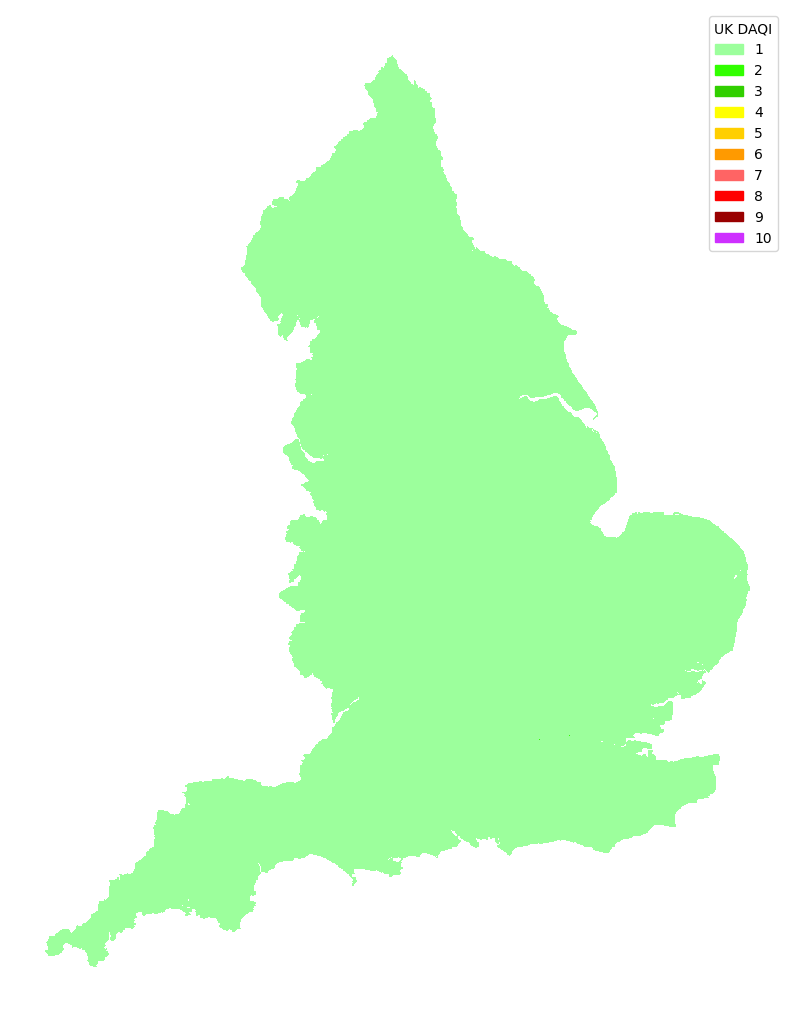

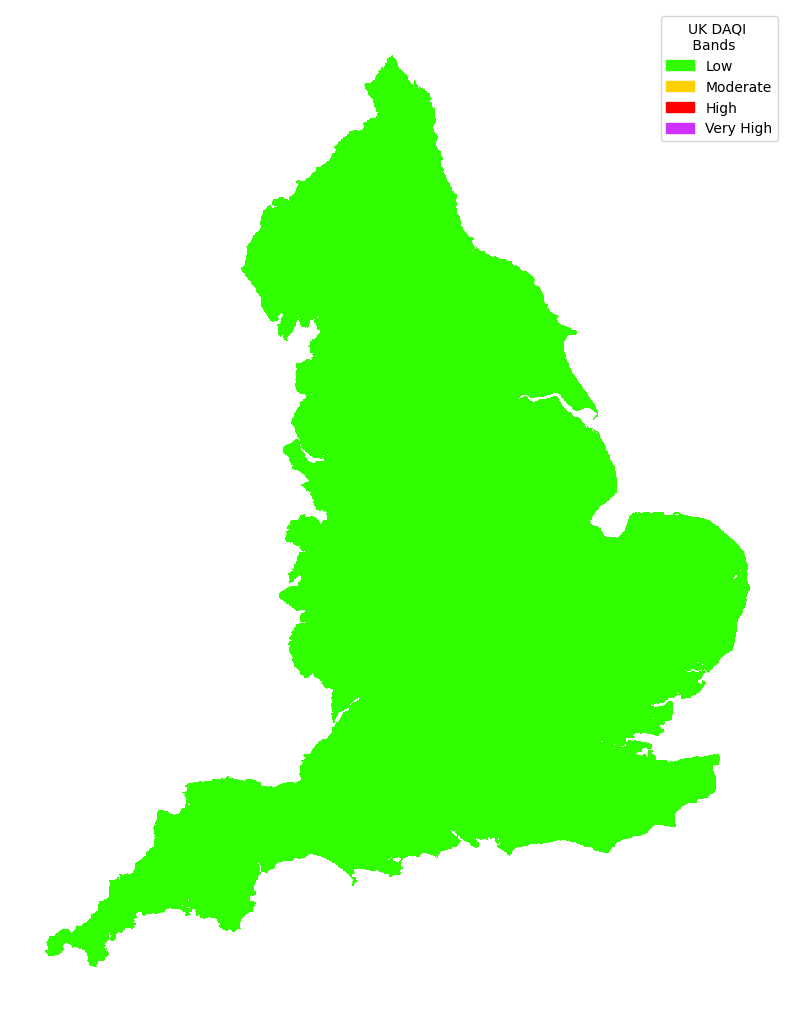

In [5]:
air_pollution_DF_daily_air_quality_index_uk = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(
    uk_complete_dataset, "no2", "no2_Prediction_Mean"
)
air_pollution_DF_daily_air_quality_index_uk = uk_grids.merge(
    air_pollution_DF_daily_air_quality_index_uk, on="UK_Model_Grid_ID"
)

ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_index(
    air_pollution_DF_daily_air_quality_index_uk,
    "no2 AQI",
    "uk_2018_01_01_080000_air_quality_index",
)
ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_bands(
    air_pollution_DF_daily_air_quality_index_uk,
    "no2 Air Quality Index AQI Band",
    "uk_2018_01_01_080000_air_quality_bands",
)

### Global

In [6]:
#This will be readded in when the third paper is published. 
# air_pollution_DF_daily_air_quality_index_global = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(
#     global_complete_dataset, "no2", "no2"
# )
# air_pollution_DF_daily_air_quality_index_global = global_grids.merge(
#     air_pollution_DF_daily_air_quality_index_global, on="Global_Model_Grid_ID"
# )

# ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_index(
#     air_pollution_DF_daily_air_quality_index_global,
#     "no2 AQI",
#     "global_2018_01_01_080000_air_quality_index",
# )
# ei_air_pollution_functions.visualise_air_pollution_daily_air_quality_bands(
#     air_pollution_DF_daily_air_quality_index_global,
#     "no2 Air Quality Index AQI Band",
#     "global_2018_01_01_080000_air_quality_bands",
# )

### England Typical Day
A core issue with the use of the data within this package is the amount of data that is avaliable (TBs of data). As such the use of the typical day, e.g. a typical monday in January at 8AM is provided to make conducting analysis more manageable. 
The dataset that is used in this tutorial is for Friday in January at midnight. 

In [7]:
uk_complete_typical_day_january_friday_midnight = (
    ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(
        1, "Friday", 0
    )
)
uk_single_datapoint_typical_day_january_friday_midnight = (
    ei_data.air_pollution_concentration_nearest_point_typical_day_united_kingdom(
        1, "Friday", 0, 51.5, 0.12, uk_grids
    )
)
display(uk_complete_typical_day_january_friday_midnight)
display(uk_single_datapoint_typical_day_january_friday_midnight)

,Northing,Easting,UK_Model_Grid_ID,Bicycle_Score,Car_and_Taxi_Score,Bus_and_Coach_Score,LGV_Score,HGV_Score,Road_Infrastructure_Distance_Residential,Road_Infrastructure_Distance_Footway,...,Temperature_2m,Boundary_Layer_Height,Downward_UV_Radiation_at_the_Surface,Instantaneous_10m_Wind_Gust,Surface_Pressure,Total_Column_Rain_Water,Month_Number,Day_of_Week_Number,Hour_Number,Week_Number
0,6406831.988,-580791.4429,69788.0,0.000000,0.000000,0.000000,0.0,0.000000,1280.338745,684.158630,...,281.565918,977.249329,0.003397,13.047138,101021.273438,0.011189,1.0,4.0,0.0,4.0
1,6406831.988,-579791.4429,20003.0,0.000000,98419.835938,188.769760,0.0,6469.514648,577.048645,239.371246,...,281.565918,977.152710,0.003397,13.047523,101022.343750,0.011224,1.0,4.0,0.0,4.0
2,6406831.988,-578791.4429,41708.0,0.000000,80626.984375,129.612671,0.0,6721.186523,969.870117,455.760010,...,281.565948,977.056091,0.003397,13.047909,101023.406250,0.011259,1.0,4.0,0.0,4.0
3,6406831.988,-577791.4429,21919.0,0.000000,24862.167969,36.379471,0.0,2315.278320,1681.279541,1421.910400,...,281.565948,976.959412,0.003397,13.048295,101024.476562,0.011294,1.0,4.0,0.0,4.0
4,6406831.988,-576791.4429,43330.0,0.000000,0.000000,0.000000,0.0,0.000000,2366.653076,2415.715576,...,281.565948,976.862793,0.003397,13.048680,101025.539062,0.011329,1.0,4.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,7484831.988,-227791.4429,444920.0,0.000000,0.000000,0.000000,0.0,0.000000,560.851562,598.732727,...,277.737762,750.658569,0.003397,11.067246,99527.226562,0.003225,1.0,4.0,0.0,4.0
355823,7484831.988,-226791.4429,445936.0,80.596329,47103.734375,0.000000,0.0,2182.585205,1480.408081,1047.788940,...,277.758057,752.038818,0.003397,11.068189,99545.875000,0.003198,1.0,4.0,0.0,4.0
355824,7484831.988,-225791.4429,447806.0,51.438866,30062.939453,0.000000,0.0,1392.987793,2463.465332,1270.912476,...,277.778351,753.419006,0.003397,11.069132,99564.523438,0.003171,1.0,4.0,0.0,4.0
355825,7485831.988,-226791.4429,445937.0,0.000000,0.000000,0.000000,0.0,0.000000,1578.710205,998.964233,...,277.781494,754.068481,0.003397,11.112224,99561.484375,0.003204,1.0,4.0,0.0,4.0


,geometry Centroid,Northing,Easting,Bicycle_Score,Car_and_Taxi_Score,Bus_and_Coach_Score,LGV_Score,HGV_Score,Road_Infrastructure_Distance_Residential,Road_Infrastructure_Distance_Footway,...,Total_Column_Rain_Water,Month_Number,Day_of_Week_Number,Hour_Number,Week_Number,Prediction Latitude,Prediction Longitude,Distance,Requested Latitude,Requested Longitude
312545,POINT (13208.557099999976 6676831.988),6676831.988,13208.5571,0.0,555899.6875,0.0,0.0,43850.320312,128.077393,157.683334,...,0.00119,1.0,4.0,0.0,4.0,51.500416,0.118654,0.001408,51.5,0.12


In [8]:
air_pollution_DF_8am = (
    ei_data.air_pollution_concentration_complete_set_real_time_united_kingdom(
        "2018-01-01_080000", "Output"
    )
)

air_pollution_DF_9am = (
    ei_data.air_pollution_concentration_complete_set_real_time_united_kingdom(
        "2018-01-01_090000", "Output"
    )
)
display(air_pollution_DF_9am)
air_pollution_DF_8am = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(
    air_pollution_DF_8am, "no2", "no2_Prediction_Mean"
)

air_pollution_DF_9am = ei_air_pollution_functions.air_pollution_concentrations_to_UK_daily_air_quality_index(
    air_pollution_DF_9am, "no2", "no2_Prediction_Mean"
)
air_pollution_DF_8am = uk_grids.merge(air_pollution_DF_8am, on="UK_Model_Grid_ID")
air_pollution_DF_9am = uk_grids.merge(air_pollution_DF_9am, on="UK_Model_Grid_ID")
display(air_pollution_DF_8am)

,Timestamp,Northing,Easting,UK_Model_Grid_ID,nox_Prediction_Mean,no2_Prediction_Mean,no_Prediction_Mean,o3_Prediction_Mean,pm10_Prediction_Mean,pm2p5_Prediction_Mean,...,pm10_Prediction_0p5_Quantile,pm2p5_Prediction_0p5_Quantile,so2_Prediction_0p5_Quantile,nox_Prediction_0p95_Quantile,no2_Prediction_0p95_Quantile,no_Prediction_0p95_Quantile,o3_Prediction_0p95_Quantile,pm10_Prediction_0p95_Quantile,pm2p5_Prediction_0p95_Quantile,so2_Prediction_0p95_Quantile
0,2018-01-01 09:00:00,6406831.988,-580791.4429,69788.0,1.941468,1.368764,0.459000,77.668365,8.898648,2.765545,...,9.053172,3.707182,1.416242,3.963346,3.198527,0.473557,85.754532,23.418850,11.636958,2.379866
1,2018-01-01 09:00:00,6406831.988,-579791.4429,20003.0,3.030114,2.638813,0.229153,78.220139,9.250736,2.631991,...,9.576310,3.838824,1.716380,7.059394,4.803483,0.740815,85.062889,22.704617,11.054633,3.588175
2,2018-01-01 09:00:00,6406831.988,-578791.4429,41708.0,2.750037,1.199255,0.204322,78.083618,8.213710,2.493622,...,8.503558,3.681389,1.171666,5.225822,4.659097,0.725744,85.927010,20.840488,10.841802,2.425152
3,2018-01-01 09:00:00,6406831.988,-577791.4429,21919.0,2.890934,1.149008,0.475548,76.330963,8.204529,2.872354,...,7.601312,4.089407,1.107180,5.483037,5.582719,0.768290,84.970253,20.519892,11.080049,2.556885
4,2018-01-01 09:00:00,6406831.988,-576791.4429,43330.0,2.120756,0.892260,0.120736,73.999527,8.000123,2.426375,...,7.268702,4.357222,1.642955,8.343828,4.670910,1.604538,83.859467,18.547503,12.219141,2.970685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,2018-01-01 09:00:00,7484831.988,-227791.4429,444920.0,3.520756,1.048279,0.624149,75.271713,8.214132,2.792295,...,8.668184,3.407990,1.269713,9.878032,7.581407,0.906589,75.887833,16.992727,9.921776,2.434897
355823,2018-01-01 09:00:00,7484831.988,-226791.4429,445936.0,4.411963,1.893508,0.295288,71.373726,8.673822,2.485076,...,7.844590,3.835025,1.274641,9.425755,9.245034,1.810442,74.322098,16.187725,10.129075,2.315028
355824,2018-01-01 09:00:00,7484831.988,-225791.4429,447806.0,5.017659,1.792779,0.319137,67.592094,10.025765,2.227173,...,8.493914,3.577077,1.155504,21.659199,10.287923,8.036416,71.051033,16.592888,10.001654,2.169373
355825,2018-01-01 09:00:00,7485831.988,-226791.4429,445937.0,2.592859,1.136905,0.357693,66.267578,8.911856,2.608354,...,9.102219,3.708925,1.391387,20.602762,8.724884,7.106015,70.179428,17.248470,10.398123,2.635535


,UK_Model_Grid_ID,geometry,geometry Centroid,Timestamp,Northing,Easting,nox_Prediction_Mean,no2_Prediction_Mean,no_Prediction_Mean,o3_Prediction_Mean,...,so2_Prediction_0p5_Quantile,nox_Prediction_0p95_Quantile,no2_Prediction_0p95_Quantile,no_Prediction_0p95_Quantile,o3_Prediction_0p95_Quantile,pm10_Prediction_0p95_Quantile,pm2p5_Prediction_0p95_Quantile,so2_Prediction_0p95_Quantile,no2 AQI,no2 Air Quality Index AQI Band
0,3327,"POLYGON ((-627291.443 6441331.988, -626291.443...",POINT (-626791.443 6440831.988),2018-01-01 08:00:00,6440831.988,-626791.4429,2.411720,1.364011,0.272455,83.844078,...,1.147541,4.439404,4.157645,0.513852,85.854401,20.093130,9.657495,5.948624,1,Low
1,3328,"POLYGON ((-627291.443 6442331.988, -626291.443...",POINT (-626791.443 6441831.988),2018-01-01 08:00:00,6441831.988,-626791.4429,2.229689,1.344347,0.331872,89.123886,...,1.004601,5.644552,5.889436,0.813379,87.797501,20.833918,9.749293,2.690150,1,Low
2,3329,"POLYGON ((-627291.443 6443331.988, -626291.443...",POINT (-626791.443 6442831.988),2018-01-01 08:00:00,6442831.988,-626791.4429,3.050975,1.095805,0.361245,77.605217,...,1.526809,4.203918,3.876387,0.929299,86.927094,21.693327,10.004307,3.042588,1,Low
3,3330,"POLYGON ((-627291.443 6440331.988, -626291.443...",POINT (-626791.443 6439831.988),2018-01-01 08:00:00,6439831.988,-626791.4429,1.553109,0.906666,0.197462,84.101326,...,1.084606,2.666461,2.386462,0.324122,87.553307,18.842777,9.488449,4.382380,1,Low
4,3331,"POLYGON ((-627291.443 6439331.988, -626291.443...",POINT (-626791.443 6438831.988),2018-01-01 08:00:00,6438831.988,-626791.4429,2.387597,1.171014,0.228570,79.085945,...,0.935753,3.194524,3.101614,0.549851,84.652092,19.307291,9.511324,2.324759,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,641080,"POLYGON ((195708.557 6853331.988, 196708.557 6...",POINT (196208.557 6852831.988),2018-01-01 08:00:00,6852831.988,196208.5571,14.286054,10.662587,2.247685,63.089848,...,1.522658,26.374025,19.113750,5.478654,77.952507,21.174980,11.300642,3.196029,1,Low
355823,641081,"POLYGON ((195708.557 6854331.988, 196708.557 6...",POINT (196208.557 6853831.988),2018-01-01 08:00:00,6853831.988,196208.5571,8.204675,5.949625,1.108966,69.093666,...,1.407368,20.606041,15.480545,3.188479,76.629166,22.567741,11.578231,2.742573,1,Low
355824,641082,"POLYGON ((195708.557 6855331.988, 196708.557 6...",POINT (196208.557 6854831.988),2018-01-01 08:00:00,6854831.988,196208.5571,9.549654,3.534935,0.331843,75.839874,...,1.386341,13.974378,11.112648,2.693116,78.675690,20.832916,11.266427,2.323258,1,Low
355825,641083,"POLYGON ((195708.557 6856331.988, 196708.557 6...",POINT (196208.557 6855831.988),2018-01-01 08:00:00,6855831.988,196208.5571,7.523200,3.560001,0.106067,76.008591,...,1.181614,6.986648,7.812216,1.078218,77.086151,17.435972,10.784443,1.702878,1,Low


## Change Visulisation 
### Spatially
Visualise the change in the air pollution concentration and air quality index for NO2 between 8am and 9am on 1st January 2018.

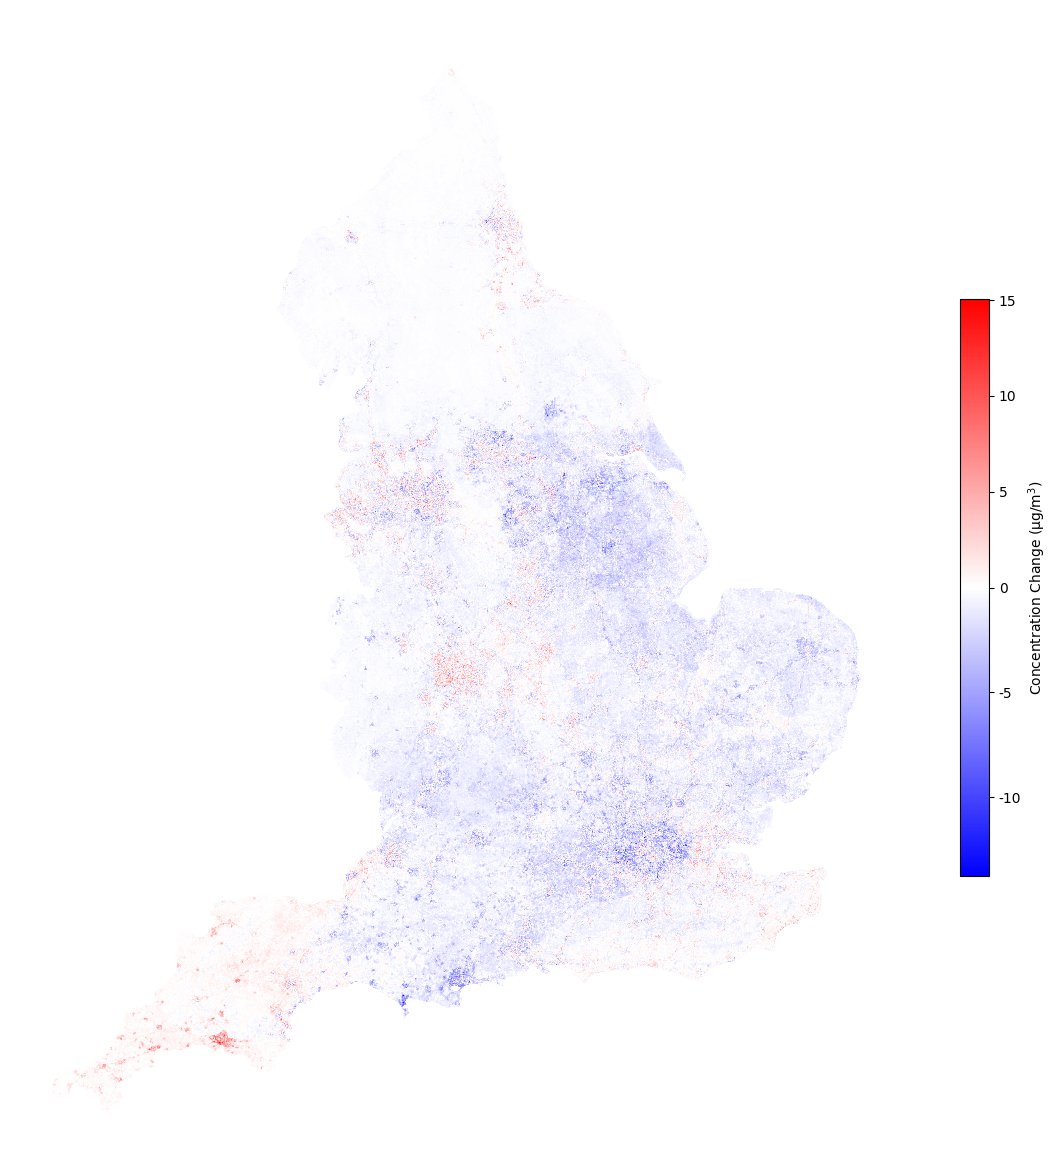

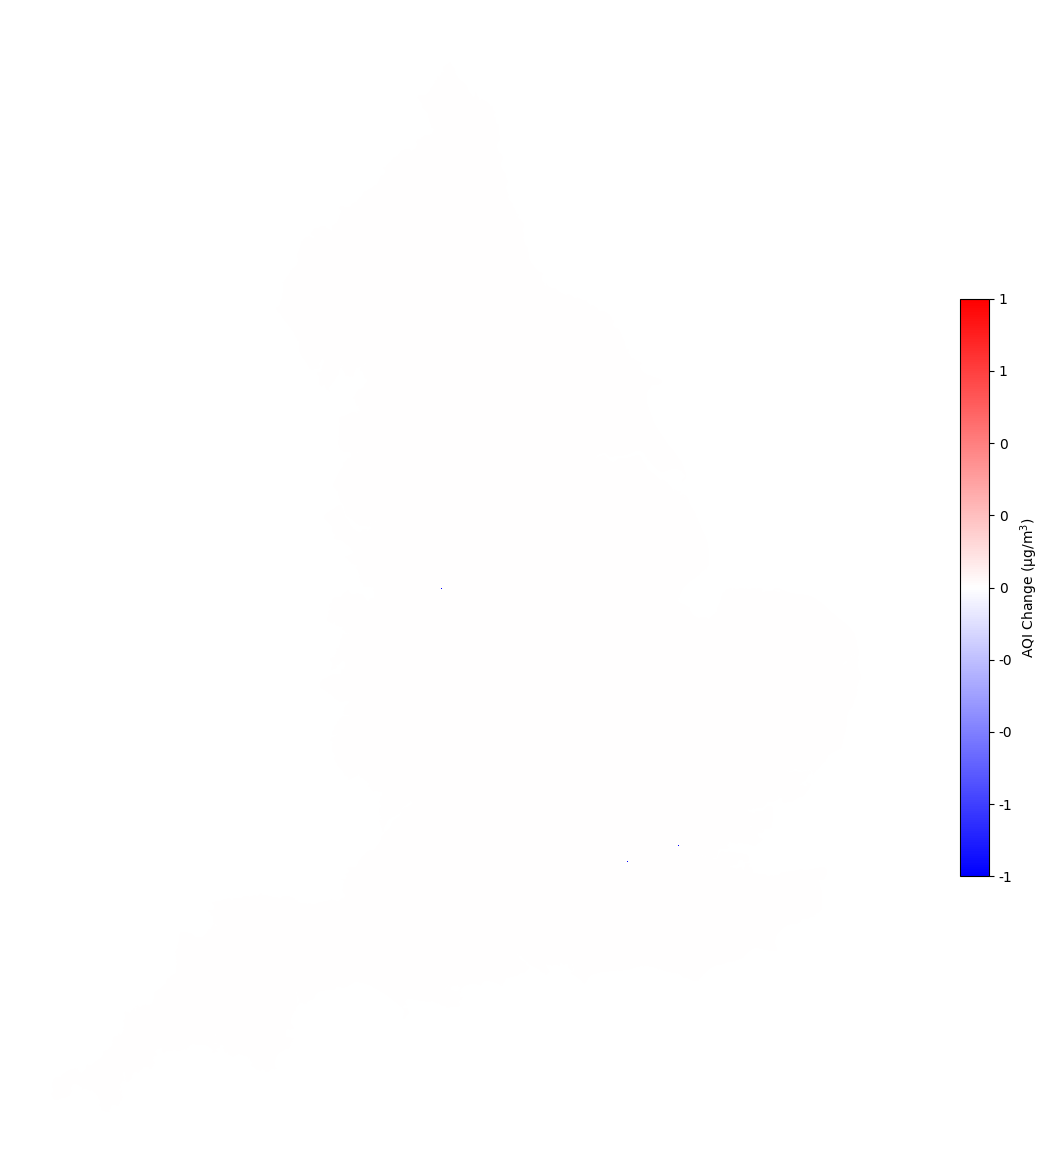

In [9]:
ei_air_pollution_functions.change_in_concentrations_visulisation(
    air_pollution_DF_8am,
    air_pollution_DF_9am,
    "no2_Prediction_Mean",
    "uk_concentration_change_between_8_9_am",
)
ei_air_pollution_functions.change_in_aqi_visulisation(
    air_pollution_DF_8am,
    air_pollution_DF_9am,
    "no2 AQI",
    "uk_aqi_change_between_8_9_am",
)

### Temporally
Visualising the changes in the air pollution concentrations across a number of timestamps. 

Alongside being able to visualise the changes in air pollution spatially, there is the ability to visualise them temporally, with an aggregate across all of the desired locations.
The example below gives the simple hypothetical scenario of changing the values based on simply doubling, or halving the concerntations. However a model could be plugged into this process as will be seen later. 

In [10]:
# Show the change in concentration line example

# A single month should be used in the example code, with the list days being populated with the days to be analysed, out of ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
month = 1
days = ["Friday"]


# The baseline_DFs represent the DFs that will create the black link in the graph, with change_* being the DFs that contain the concentrations with some change, in this case the change_positive_DFs being the doubling of the concentrations and
# change_negative_DFs being the halving of the concentrations.
baseline_DFs = dict()
change_postive_DFs = dict()
change_negative_DFs = dict()
for day_of_week in days:

    # Create a nested list for each day
    baseline_DFs_single_day = dict()
    change_postive_DFs_single_day = dict()
    change_negative_DFs_single_day = dict()
    for hour in np.arange(0, 24):

        air_pollution_DF_input = (
            ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(
                month, day_of_week, hour, "Input"
            )
        )
        air_pollution_DF_output = (
            ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(
                month, day_of_week, hour, "Output"
            )
        )
        
        # find the set of column names they share
        common_cols = air_pollution_DF_input.columns.intersection(air_pollution_DF_output.columns).tolist()
        
        # do an inner merge on *all* of those columns
        air_pollution_DF = pd.merge(
            air_pollution_DF_input,
            air_pollution_DF_output,
            on=common_cols,
            suffixes=('_input', '_output')  # in case there are any other overlapping column names
        )


        air_pollution_DF = air_pollution_DF.rename(
            columns={"nox_Prediction_Mean": "Model Prediction"}
        )
        baseline_DFs_single_day[hour] = air_pollution_DF
        air_pollution_DF_change = air_pollution_DF.copy(deep=True)

        # Double all of the concentrations and add the DF to the corresponding list.
        air_pollution_DF_change["Model Prediction"] = (
            air_pollution_DF_change["Model Prediction"] * 2
        )
        change_postive_DFs_single_day[hour] = air_pollution_DF_change

        # Repeat the process but for the halving of the concentrations
        air_pollution_DF_change = air_pollution_DF.copy(deep=True)
        air_pollution_DF_change["Model Prediction"] = (
            air_pollution_DF_change["Model Prediction"] * 0.5
        )
        change_negative_DFs_single_day[hour] = air_pollution_DF_change

    baseline_DFs[day_of_week] = baseline_DFs_single_day
    change_postive_DFs[day_of_week] = change_postive_DFs_single_day
    change_negative_DFs[day_of_week] = change_negative_DFs_single_day


display(change_postive_DFs["Friday"][0])

,Northing,Easting,UK_Model_Grid_ID,Bicycle_Score,Car_and_Taxi_Score,Bus_and_Coach_Score,LGV_Score,HGV_Score,Road_Infrastructure_Distance_Residential,Road_Infrastructure_Distance_Footway,...,pm10_Prediction_0p5_Quantile,pm2p5_Prediction_0p5_Quantile,so2_Prediction_0p5_Quantile,nox_Prediction_0p95_Quantile,no2_Prediction_0p95_Quantile,no_Prediction_0p95_Quantile,o3_Prediction_0p95_Quantile,pm10_Prediction_0p95_Quantile,pm2p5_Prediction_0p95_Quantile,so2_Prediction_0p95_Quantile
0,6406831.988,-580791.4429,69788.0,0.000000,0.000000,0.000000,0.0,0.000000,1280.338745,684.158630,...,11.441975,4.480162,0.633733,5.057902,4.742328,0.597101,77.178543,23.183298,11.309865,1.762423
1,6406831.988,-579791.4429,20003.0,0.000000,98419.835938,188.769760,0.0,6469.514648,577.048645,239.371246,...,12.811199,4.401461,1.242737,4.612142,5.901142,0.688741,79.789757,24.128859,10.681367,1.934796
2,6406831.988,-578791.4429,41708.0,0.000000,80626.984375,129.612671,0.0,6721.186523,969.870117,455.760010,...,11.808648,4.363959,0.774476,4.750860,6.719103,0.698497,77.452599,22.905190,11.384246,2.201080
3,6406831.988,-577791.4429,21919.0,0.000000,24862.167969,36.379471,0.0,2315.278320,1681.279541,1421.910400,...,10.823124,4.562641,0.915494,5.702785,5.136529,0.663352,78.765457,23.431173,11.441548,2.154057
4,6406831.988,-576791.4429,43330.0,0.000000,0.000000,0.000000,0.0,0.000000,2366.653076,2415.715576,...,10.891258,5.380339,1.186813,8.412834,6.104919,1.747221,71.950645,21.597229,13.562875,2.795234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
355822,7484831.988,-227791.4429,444920.0,0.000000,0.000000,0.000000,0.0,0.000000,560.851562,598.732727,...,9.122108,4.735170,1.243904,16.356863,8.561252,1.621391,76.100845,19.723269,12.144406,3.902158
355823,7484831.988,-226791.4429,445936.0,80.596329,47103.734375,0.000000,0.0,2182.585205,1480.408081,1047.788940,...,8.333984,3.882011,1.274280,11.529066,6.589286,0.923066,76.024727,18.494312,11.838426,1.917808
355824,7484831.988,-225791.4429,447806.0,51.438866,30062.939453,0.000000,0.0,1392.987793,2463.465332,1270.912476,...,8.267007,3.731025,1.253040,27.634800,8.839131,6.036098,72.246391,18.344259,11.454227,1.902168
355825,7485831.988,-226791.4429,445937.0,0.000000,0.000000,0.000000,0.0,0.000000,1578.710205,998.964233,...,9.938605,3.897847,1.454898,28.351791,9.462789,7.096638,68.832474,19.294586,11.806692,2.584531


Visualise the changes based on the list of dataframe.

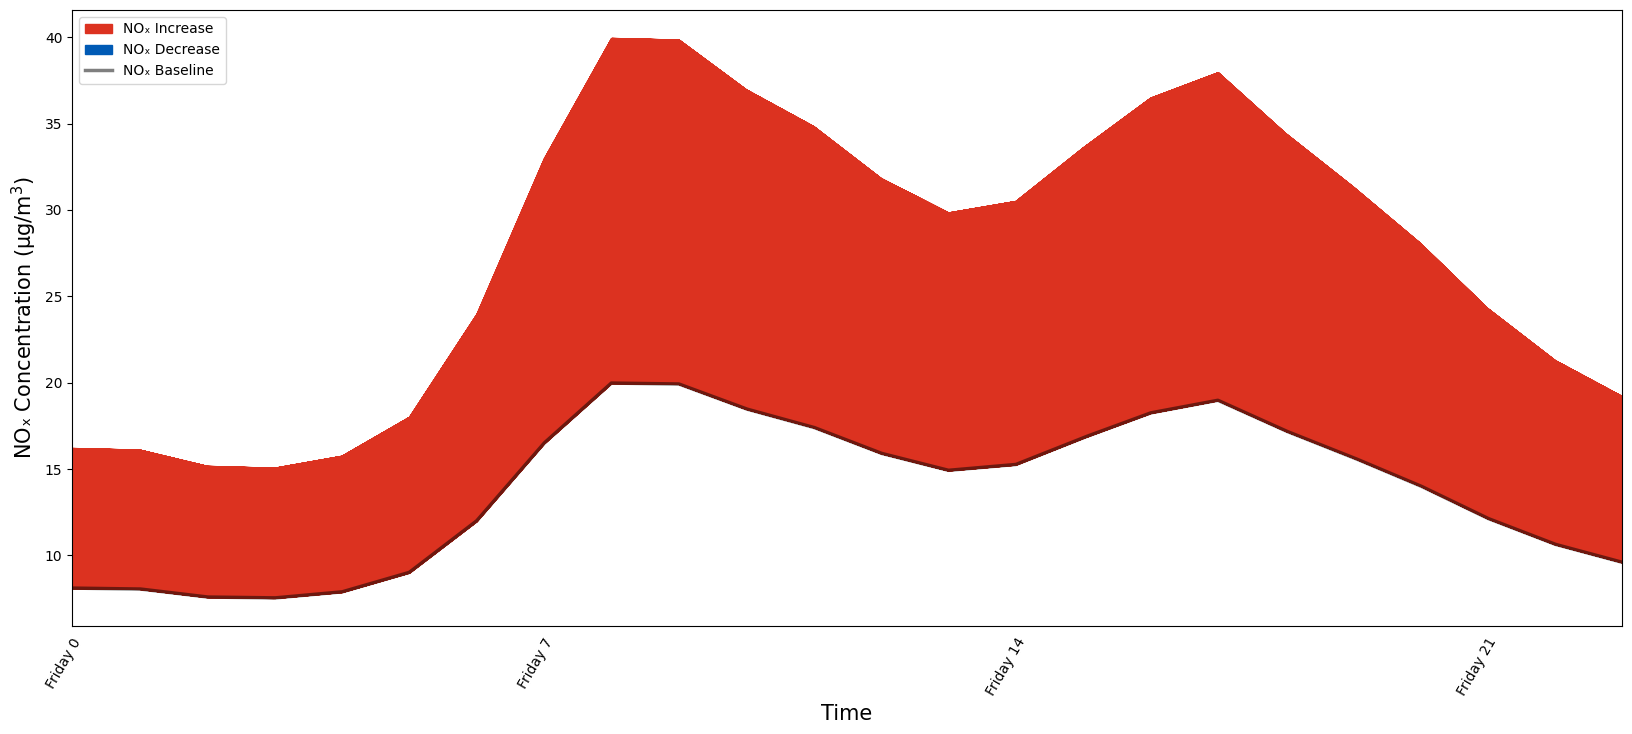

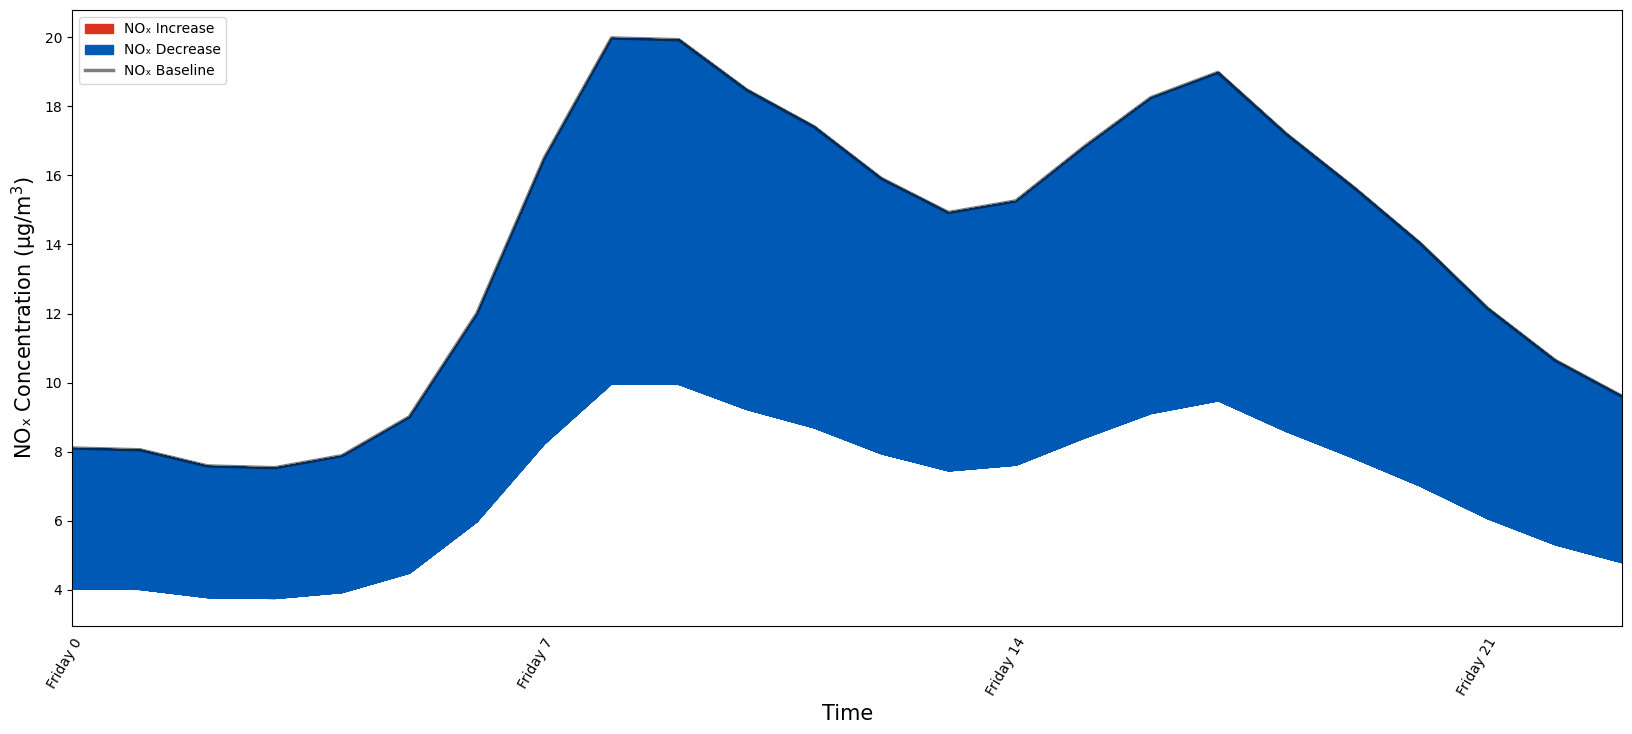

In [11]:
ei_air_pollution_functions.change_in_concentration_line(
    "nox",
    baseline_DFs,
    change_postive_DFs,
    ["Friday"],
    list(np.arange(0, 24)),
    "nox_change_line_positive",
)
ei_air_pollution_functions.change_in_concentration_line(
    "nox",
    baseline_DFs,
    change_negative_DFs,
    ["Friday"],
    list(np.arange(0, 24)),
    "nox_change_line_negative",
)

## Predicitions
Example of using the model to create new predictions based on a changing feature vector. 
Exploring the air pollution change when the wind gust doubles across all locations within the feature vector. 

In [12]:
climate_projection_model = ei_models.load_model_united_kingdom(
    "0.5", "no2", "All"
)

typical_day_feature_vector = (
    ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(
        1, "Friday", 8
    )
)

typical_day_feature_vector_climate_change = typical_day_feature_vector.copy(deep=True)

# Double the wind gusts within the feature vector DF.
typical_day_feature_vector_climate_change["Instantaneous_10m_Wind_Gust"] = (
    typical_day_feature_vector_climate_change["Instantaneous_10m_Wind_Gust"] * 2
)
display(climate_projection_model)

Model loaded successfully from environmental_insights/environmental_insights_models/ML-HAPPE/Models/0.5/no2/All_Stations/no2/model_booster.txt and environmental_insights/environmental_insights_models/ML-HAPPE/Models/0.5/no2/All_Stations/no2/model_params.json


LGBMRegressor(alpha=0.5, boosting_type='goss', deterministic=True, max_bin=255,
              min_data_in_leaf=3915, n_estimators=1230, n_jobs=-1,
              num_leaves=2274, num_threads=30, objective='quantile',
              reg_lambda=0.25, silent='warn', verbose=-1)

In [13]:
# Calculate the air pollution predicitons for the old and the new feature vector and describe the data, highlighting the changes between the scenarios.

display(
    ei_models.make_concentration_predictions_united_kingdom(
        climate_projection_model,
        typical_day_feature_vector,
        ei_models.get_model_feature_vector("All"),
    ).describe()
)
display(
    ei_models.make_concentration_predictions_united_kingdom(
        climate_projection_model,
        typical_day_feature_vector_climate_change,
        ei_models.get_model_feature_vector("All"),
    ).describe()
)

,UK_Model_Grid_ID,Model Prediction
count,355827.000000,355827.000000
mean,443642.723430,13.494427
std,136366.465735,12.027322
min,3327.000000,0.945760
25%,361150.500000,5.385427
50%,462899.000000,9.853278
75%,552098.500000,16.311187
max,641084.000000,169.653166


,UK_Model_Grid_ID,Model Prediction
count,355827.000000,355827.000000
mean,443642.723430,11.230134
std,136366.465735,9.222002
min,3327.000000,0.833861
25%,361150.500000,4.798834
50%,462899.000000,8.482959
75%,552098.500000,13.961881
max,641084.000000,136.247413


## Auxiliary Data
Access Up to Date OpenStreetMaps data

In [ ]:
# Access the amenities of interest, in this case hospitals.
bbox = [51.29, -0.51, 51.69, 0.33]  # Example bounding box around Berlin
amenities_gdf = ei_data.get_amenities_as_geodataframe("hospital", *bbox)
display(amenities_gdf)

# Access the highways of interest, in this case motorways.
bbox = [49.8, -10.5, 60.9, 2.2]
highways_gdf = ei_data.get_highways_as_geodataframe("motorway", *bbox)
highways_gdf.crs = 4326
highways_gdf = highways_gdf.to_crs(3395)
display(highways_gdf)

,name,geometry
0,Priory Hospital,POINT (-0.1183 51.63206)
1,Bridge Lane Health Centre,POINT (-0.16632 51.47327)
2,British Home & Hospital for Incurables,POINT (-0.10707 51.42309)
3,Chelsfield Park Hospital,POINT (0.13167 51.35826)
4,Jasmine Centre,POINT (0.26085 51.4339)
...,...,...
218,City & Hackney Centre for Mental Health,POINT (-0.04441 51.55033)
219,Maudsley Hospital,POINT (-0.09026 51.46904)
220,London Clinic,POINT (-0.14997 51.5229)
221,The Priory,POINT (-0.2516 51.46226)


In [ ]:
# Add into the feature vector a new distance feature vector element for a new moroway onto the exists motorway network.
start_point = [0.071113, 52.231664]
end_point = [1.3, 52.6]
uk_grids_centroid = uk_grids.copy(deep=True)
uk_grids_centroid["geometry"] = uk_grids_centroid["geometry"].centroid
new_data, highways_user_added = ei_data.calculate_new_metrics_distance_total(
    highways_gdf, "motorway", start_point, end_point, uk_grids_centroid, uk_grids
)

In [ ]:
# visualise the new motorway segment (red) alongside the currently existing network (blue)
color_map = {"osm": "blue", "User Added": "red"}

fig, axes = plt.subplots(1, figsize=(15, 15))
highways_gdf.plot(ax=axes, color=highways_user_added["source"].map(color_map))
axes.axis("off")
# Create custom legend handles
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color="blue", lw=2, label="Current\nMotorway"),
]

# Add the custom legend to the axis
axes.legend(
    handles=legend_elements, fontsize=20, bbox_to_anchor=(1.2, 0.95), markerscale=2
)


fig, axes = plt.subplots(1, figsize=(15, 15))
highways_user_added.plot(ax=axes, color=highways_user_added["source"].map(color_map))
axes.axis("off")
# Create custom legend handles
legend_elements = [
    matplotlib.lines.Line2D([0], [0], color="red", lw=2, label="Proposed\nMotorway"),
    matplotlib.lines.Line2D([0], [0], color="blue", lw=2, label="Current\nMotorway"),
]

# Add the custom legend to the axis
axes.legend(
    handles=legend_elements, fontsize=20, bbox_to_anchor=(1.2, 0.95), markerscale=2
)

# Load in the different models.
air_pollutants = ["no2", "o3", "pm10", "pm2.5", "so2"]
complete_models = dict()
for air_pollutant in air_pollutants:
    complete_models[air_pollutant] = ei_models.load_model_united_kingdom(
        "0.5", air_pollutant, "All"
    )

typical_day_feature_vector = (
    ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(
        1, "Friday", 8
    )
)

In [ ]:
# The same process as above, is conducted with a real model, and the example of changing the motorway network analysed in the feature vector.
baseline_DFs_air_pollutant = dict()
change_DFs_air_pollutant = dict()
for air_pollutant in air_pollutants:
    month = 1
    days = ["Friday"]
    baseline_DFs = dict()
    changeDFs = dict()
    for day_of_week in days[:1]:
        display(day_of_week)
        baseline_DFs_single_day = dict()
        change_DFs_single_day = dict()
        for hour in np.arange(0, 24):

            # Read in the relevant feature vector for the desired timestamp.
            feature_vector = ei_data.air_pollution_concentration_typical_day_real_time_united_kingdom(
                month, day_of_week, hour
            )

            # Create the baseline based on the current data
            air_pollution_estimation_baseline = (
                ei_models.make_concentration_predictions_united_kingdom(
                    complete_models[air_pollutant],
                    feature_vector,
                    ei_models.get_model_feature_vector(
                        "All"
                    ),
                )
            )
            air_pollution_estimation_baseline = (
                air_pollution_estimation_baseline.rename(
                    columns={"Model Prediction": "Model Prediction Baseline"}
                )
            )
            

            new_data = new_data.rename(columns={"Road Infrastructure Distance motorway":"Road_Infrastructure_Distance_Motorway"})
            new_data = new_data.rename(columns={"Total Length motorway":"Total_Length_Motorway"})
                
            # Modify the feature vector to include details of the new motorway segment.
            feature_vector_modified = ei_data.replace_feature_vector_column(
                feature_vector, new_data, "Road_Infrastructure_Distance_Motorway"
            )
            feature_vector_modified = ei_data.replace_feature_vector_column(
                feature_vector_modified, new_data, "Total_Length_Motorway"
            )

            # Calculate the new air pollution concentrations based on the modified feature vector.
            air_pollution_estimation_modified = (
                ei_models.make_concentration_predictions_united_kingdom(
                    complete_models[air_pollutant],
                    feature_vector_modified,
                    ei_models.get_model_feature_vector(
                        "All"
                    ),
                )
            )
            
            air_pollution_estimation_modified = (
                air_pollution_estimation_modified.rename(
                    columns={"Model Prediction": "Model Prediction Modified"}
                )
            )

            air_pollution_estimation = air_pollution_estimation_modified.merge(
                air_pollution_estimation_baseline, on="UK_Model_Grid_ID"
            )


            air_pollution_estimation_difference = air_pollution_estimation[
                air_pollution_estimation["Model Prediction Baseline"]
                != air_pollution_estimation["Model Prediction Modified"]
            ]

            baseline_DFs_single_day[hour] = air_pollution_estimation_difference[
                ["UK_Model_Grid_ID", "Model Prediction Baseline"]
            ].rename(columns={"Model Prediction Baseline": "Model Prediction"})
            change_DFs_single_day[hour] = air_pollution_estimation_difference[
                ["UK_Model_Grid_ID", "Model Prediction Modified"]
            ].rename(columns={"Model Prediction Modified": "Model Prediction"})

        baseline_DFs[day_of_week] = baseline_DFs_single_day
        changeDFs[day_of_week] = change_DFs_single_day
    baseline_DFs_air_pollutant[air_pollutant] = baseline_DFs
    change_DFs_air_pollutant[air_pollutant] = changeDFs

## Complex Analytics

Visualise the changes in air pollution across a typical friday due to the placement of the new motorway segment 

In [ ]:
chage_concentration_lines_figs = dict()
for air_pollutant in air_pollutants:
    chage_concentration_lines_figs[air_pollutant] = (
        ei_air_pollution_functions.change_in_concentration_line(
            air_pollutant,
            baseline_DFs_air_pollutant[air_pollutant],
            change_DFs_air_pollutant[air_pollutant],
            ["Friday"],
            list(np.arange(0, 24)),
            "motorway_addition_" + air_pollutant,
        )
    )